## Top Instagram Influencer Analysis Project
The goal of this project is to analyze top Instagram influencers based on their followers, engagement rate, and other key metrics.


In [176]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting style
sns.set(style="whitegrid")
%matplotlib inline

## Load CSV File
We will load the CSV file and check the first 5 rows to understand the data.


In [177]:
df = pd.read_csv(r"C:\Users\vaish\Downloads\top_insta_influencers_data.csv")


In [178]:
# Display first 5 rows
df.head()


,Rank,Channel_info,Influence_score,Posts,Followers,Avg_likes,60_day_eng_rate,New_post_avg_like,Total_likes,Country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


## Data Overview
- Check columns and data types
- Identify missing values


In [179]:
# Data info

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               200 non-null    int64 
 1   Channel_info       200 non-null    object
 2   Influence_score    200 non-null    int64 
 3   Posts              200 non-null    object
 4   Followers          200 non-null    object
 5   Avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   New_post_avg_like  200 non-null    object
 8   Total_likes        200 non-null    object
 9   Country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [180]:
# Check missing values

df.isnull().sum()


Rank                  0
Channel_info          0
Influence_score       0
Posts                 0
Followers             0
Avg_likes             0
60_day_eng_rate       0
New_post_avg_like     0
Total_likes           0
Country              62
dtype: int64

In [181]:
#Drop rows with missing Country

df = df.dropna(subset=['Country'])


In [182]:
df['Country'] = df['Country'].fillna('Unknown')


In [183]:
# Check missing values

df.isnull().sum()

Rank                 0
Channel_info         0
Influence_score      0
Posts                0
Followers            0
Avg_likes            0
60_day_eng_rate      0
New_post_avg_like    0
Total_likes          0
Country              0
dtype: int64

##  Feature Engineering – Engagement Rate

The purpose of this step is to calculate the Engagement Rate of each influencer.
Engagement Rate shows how actively followers interact with an influencer’s content.
It is more important than followers for marketing analysis.


In [184]:
import numpy as np
import pandas as pd

# Remove extra spaces from column names
df.columns = df.columns.str.strip()


In [185]:
# Function to convert m and k into numbers
def parse_number(x):
    if pd.isna(x):
        return np.nan
    x = str(x).lower().replace(',', '').strip()
    
    if x.endswith('m'):
        return float(x[:-1]) * 1_000_000
    elif x.endswith('k'):
        return float(x[:-1]) * 1_000
    else:
        return float(x)

**Apply Cleaning to Columns**

In [186]:
# Columns that need cleaning
numeric_cols = ['Followers', 'Avg_likes', 'New_post_avg_like']

for col in numeric_cols:
    df[col] = df[col].apply(parse_number)


Engagement Rate (%) =
(Avg Likes + New Post Avg Likes) / Followers × 100


In [187]:
# Engagement Rate calculation
df['Engagement_Rate'] = (
    (df['Avg_likes'] + df['New_post_avg_like']) / df['Followers']
) * 100


In [188]:
df[['Influence_score',
    'Followers',
    'Avg_likes',
    'New_post_avg_like',
    'Engagement_Rate']].head()


,Influence_score,Followers,Avg_likes,New_post_avg_like,Engagement_Rate
0,92,475800000.0,8700000.0,6500000.0,3.194620
1,91,366200000.0,8300000.0,5900000.0,3.877662
3,93,342700000.0,6200000.0,3300000.0,2.772104
4,91,334100000.0,1900000.0,665300.0,0.767824
5,91,329200000.0,3500000.0,2900000.0,1.944107


In Step 4, I cleaned numeric columns containing abbreviations like 'm' and 'k',
converted them into proper numeric values, and calculated engagement rate
to measure influencer performance more accurately.


## Identifying Top Influencers

The purpose of this step is to identify the most influential Instagram accounts
based on two key metrics:
1. Number of Followers (Popularity)
2. Engagement Rate (Audience Interaction)


In [189]:
# Top 10 influencers by Followers
top_followers = df.sort_values(by='Followers', ascending=False).head(10)

top_followers[['Rank',
               'Channel_info',
               'Followers',
               'Engagement_Rate']]


,Rank,Channel_info,Followers,Engagement_Rate
0,1,cristiano,475800000.0,3.194620
1,2,kyliejenner,366200000.0,3.877662
3,4,selenagomez,342700000.0,2.772104
4,5,therock,334100000.0,0.767824
5,6,kimkardashian,329200000.0,1.944107
6,7,arianagrande,327700000.0,2.319194
7,8,beyonce,272800000.0,2.052786
8,9,khloekardashian,268300000.0,1.239993
9,10,justinbieber,254500000.0,1.335953
10,11,kendalljenner,254000000.0,4.173228


- These influencers have the largest audience reach.
- High followers indicate strong popularity and visibility.
- However, high followers do not always mean high engagement.


In [190]:
# Top 10 influencers by Engagement Rate
top_engagement = df.sort_values(by='Engagement_Rate', ascending=False).head(10)

top_engagement[['Rank',
                'Channel_info',
                'Followers',
                'Engagement_Rate']]


,Rank,Channel_info,Followers,Engagement_Rate
118,119,zayn,46500000.0,18.709677
114,115,harrystyles,46900000.0,16.204691
78,79,karolg,55600000.0,15.827338
75,76,milliebobbybrown,57600000.0,15.625000
97,98,adele,50700000.0,13.017751
177,178,kimberly.loaiza,35500000.0,12.394366
83,84,zacefron,54500000.0,12.293578
120,121,travisscott,46200000.0,12.121212
56,57,bts.bighitofficial,66900000.0,11.509716
191,192,danbilzerian,33600000.0,9.523810


- These influencers generate strong interaction with their audience.
- Some influencers have fewer followers but higher engagement.
- Such influencers are ideal for targeted marketing campaigns.


In [191]:
df[['Followers', 'Engagement_Rate']].describe()


,Followers,Engagement_Rate
count,1.380000e+02,138.000000
mean,8.372609e+07,3.429192
std,8.103318e+07,3.541799
min,3.280000e+07,0.168519
25%,4.100000e+07,1.249293
50%,5.270000e+07,2.281130
75%,7.032500e+07,3.958766
max,4.758000e+08,18.709677


### Comparison of Followers and Engagement Rate

This comparison helps us understand that popularity and engagement
do not always go hand in hand.


## Data Visualization and Insights

The objective of this step is to visually analyze influencer performance
and derive meaningful insights using charts and plots.


- Followers Distribution

This chart shows how followers are distributed among influencers.


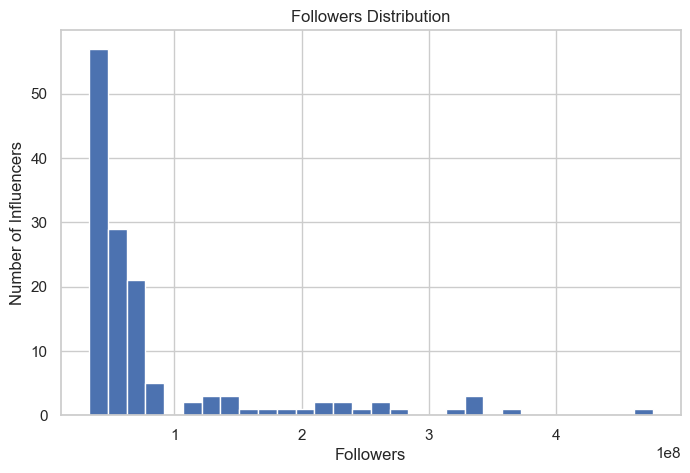

In [192]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Followers'], bins=30)
plt.title('Followers Distribution')
plt.xlabel('Followers')
plt.ylabel('Number of Influencers')
plt.show()


- Followers are unevenly distributed.
- A small number of influencers have extremely high followers.
- Most influencers fall in the mid to high follower range.


- Engagement Rate Distribution

This chart shows how engagement rates vary across influencers.


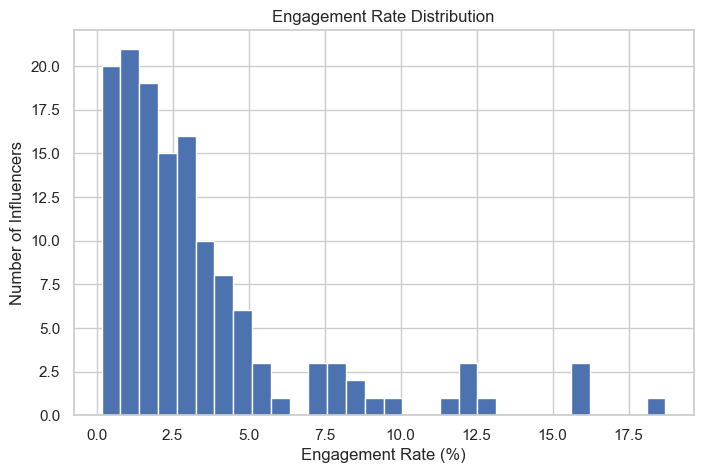

In [193]:
plt.figure(figsize=(8,5))
plt.hist(df['Engagement_Rate'], bins=30)
plt.title('Engagement Rate Distribution')
plt.xlabel('Engagement Rate (%)')
plt.ylabel('Number of Influencers')
plt.show()


- Engagement rates vary significantly.
- High engagement is not common among all influencers.
- Engagement rate is a better metric than followers for campaign success.


- Followers vs Engagement Rate

This scatter plot shows the relationship between followers and engagement.


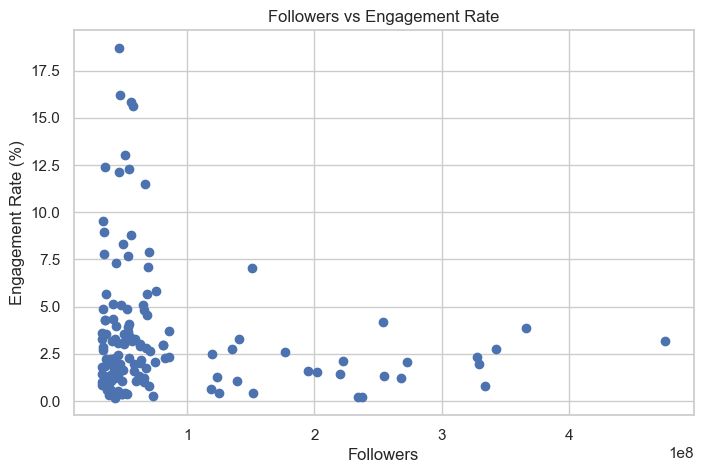

In [194]:
plt.figure(figsize=(8,5))
plt.scatter(df['Followers'], df['Engagement_Rate'])
plt.title('Followers vs Engagement Rate')
plt.xlabel('Followers')
plt.ylabel('Engagement Rate (%)')
plt.show()


- There is no strong linear relationship between followers and engagement rate.
- Some influencers with fewer followers have very high engagement.
- Brands should not select influencers based only on follower count.


- Top 10 Influencers by Followers


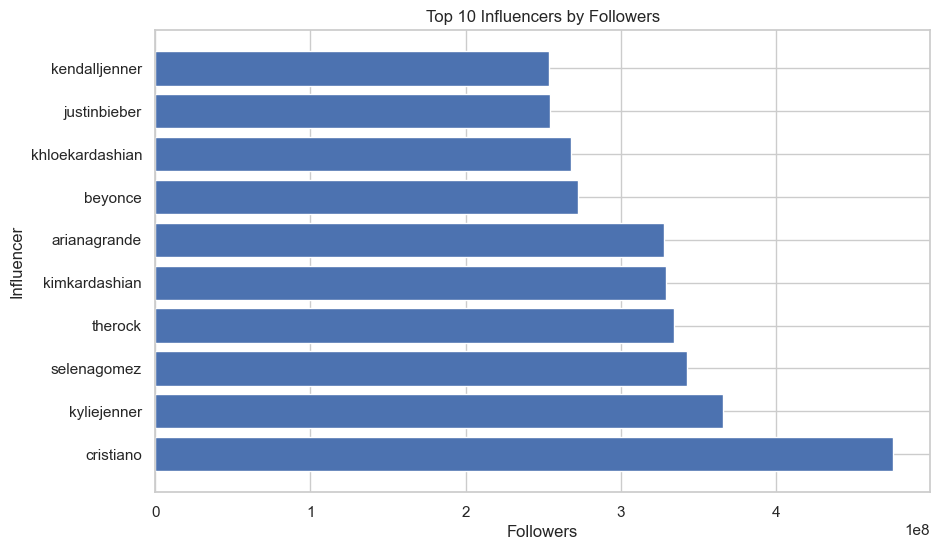

In [195]:
top_followers = df.sort_values(by='Followers', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_followers['Channel_info'], top_followers['Followers'])
plt.title('Top 10 Influencers by Followers')
plt.xlabel('Followers')
plt.ylabel('Influencer')
plt.show()


##  Exploratory Data Analysis (EDA)

The objective of EDA is to understand data patterns, relationships,
outliers, and distributions before applying machine learning models.


In [197]:
df[['Followers', 'Avg_likes', 'New_post_avg_like', 'Engagement_Rate']].describe()


,Followers,Avg_likes,New_post_avg_like,Engagement_Rate
count,1.380000e+02,1.380000e+02,1.380000e+02,138.000000
mean,8.372609e+07,1.492658e+06,9.673341e+05,3.429192
std,8.103318e+07,1.537165e+06,1.320879e+06,3.541799
min,3.280000e+07,6.510000e+04,0.000000e+00,0.168519
25%,4.100000e+07,4.231750e+05,1.810250e+05,1.249293
50%,5.270000e+07,1.100000e+06,4.245500e+05,2.281130
75%,7.032500e+07,1.900000e+06,1.200000e+06,3.958766
max,4.758000e+08,8.700000e+06,6.500000e+06,18.709677


- Followers show high variance.
- Engagement rate is relatively low for most influencers.
- Some influencers act as outliers.


In [198]:
df[['Followers', 'Avg_likes', 'New_post_avg_like', 'Engagement_Rate']].corr()


,Followers,Avg_likes,New_post_avg_like,Engagement_Rate
Followers,1.000000,0.610347,0.523557,-0.144297
Avg_likes,0.610347,1.000000,0.871394,0.562162
New_post_avg_like,0.523557,0.871394,1.000000,0.626506
Engagement_Rate,-0.144297,0.562162,0.626506,1.000000


- Engagement rate has a stronger relation with likes than followers.
- Followers alone are not a strong predictor of engagement.


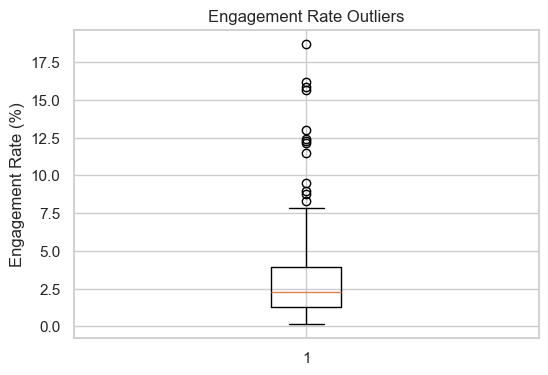

In [199]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Engagement_Rate'])
plt.title('Engagement Rate Outliers')
plt.ylabel('Engagement Rate (%)')
plt.show()


- Few influencers have unusually high engagement.
- These are valuable targets for niche marketing.
